# Mini Project - Week 6&7: World Happiness Report 2016
Lindsay Sager

# Read in Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("2016.csv")

# 1. High Level View
- head & tail - a closer look at the top 5 and bottom 5 observations of the dataframe.
- shape - information about the number of observations and number of variables (ie columns) in the dataset.
- info - more information about the types of variables (ie columns) in the dataset. numerical or categorical.
- nunique() - additional information about the two categorical values. we see 157 unique countries across 10 geographical regions in this case

In [2]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
df.tail(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [4]:
df.shape

(157, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [6]:
df['Country'].nunique()

157

In [7]:
df['Region'].nunique()

10

This dataset consists of information about happiness score and ranking from 157 unique countries across 10 unique geographical regions (found with df.nunique()). The shape of the dataset has 157 rows, which coincides with the 157 unique countries. The .csv file is also called 2016, so we can assume this dataset provides information about world happiness in 2016.

From looking at the info() of the dataset, we can see that aside from categorical fields of 'Country' and 'Region', all other columns (variables) contain numerical fields. While we weren't provided any information about the metrics used to determine each of the numerical categories, according to the World Happiness Report from 2016: (https://s3.amazonaws.com/happiness-report/2016/HR-V1Ch1_web.pdf) the 7 numerical fields (excluding happiness score and happiness rank) can be added together to achieve the reported happiness score for each country.

From looking at the head() of the dataset, we see that a higher 'Happiness Score' matches a 'Happiness Ranking' closer to 1. Therefore, 'Happiness Ranking' = 1 is country with the highest 'Happiness Score' and 'Happiness Ranking' = 157 is the country with the lowest 'Happiness Score'.

# B. Preliminary Exploration
 1. researching the source of the dataset
 2. summary statistical analysis
 3. checking for missing values
 4. visualizing distributions of numerical fields
 5. evaluating noise and cleaning dataset 

### 1. Researching the Dataset

After looking a bit closer at the variable calculations for this dataset, according to the World Happiness Report from 2021: (https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf), the 'Happiness Score' aka subjective well-being assessment is a score from 0-10 that survey participants answer.

Therefore, the values being reported for non-happiness score/rank fields are actually calculated (aka not measured) values. While we explore the data further and evaluate relationships between variables, this should be taken into account.

Additionally, according to the World Happiness Report from 2021 (mentioned above), the reported values for Family (social support), Freedom (of choice), Trust and Generosity are averages of survery participant responses to a single binary (0,1) question for each variable.

### 2. Statistical Analysis
Describe - Dataframe statistics of all numerical fields. Can be used to identify any gaps in the dataset.


In [8]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


#### The count for all columns indicates that we have 157 values in each, so no gaps in the dataset.

### 3. Check for Missing Values
- isna().sum() - Determines the total count of missing (na) values for each column

In [9]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### This confirms what we saw above with describe(), there are no missing values in the dataset.

### 4. Visualize Distributions of the Numerical Fields
   - Histograms - visualize the density of values, shape of distribution (i.e. skew, # of modes, outliers)
   - Box Plots - visualize variability in the dataset, helpful for identifying outliers

#### Scales for variables:

Happiness Score - Range (0-10) subjective scoring scale https://worldpopulationreview.com/country-rankings/happiest-countries-in-the-world

Other features - Binary 0/1 scoring scale https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf
- Family (social support)
- Freedom (perceived freedom of choice)
- Trust (in government)
- Generosity (donations to charity)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
color_palette = ('#d5d560', '#a6d070', '#7cc683', '#5cba94', '#4aac9f', '#4c9ca1', '#588c99', '#637c8a')

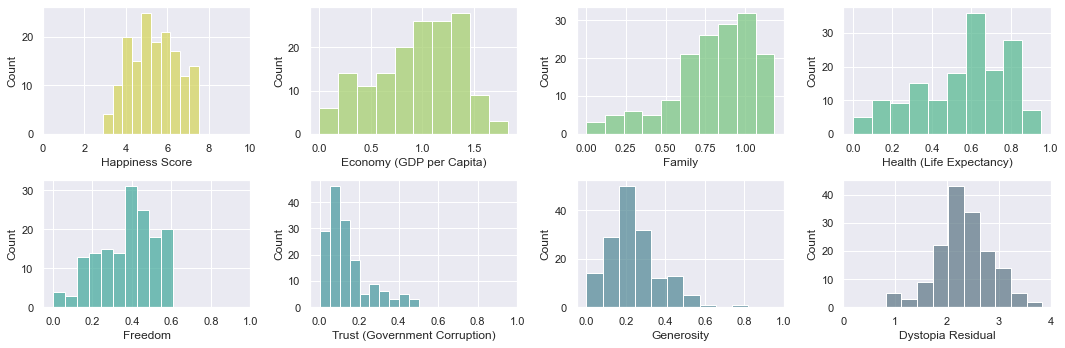

In [11]:
fig, axes = plt.subplots(2,4, figsize=(15,5))
sns.histplot(df, x="Happiness Score", color='#d5d560', bins=10, ax=axes[0,0])
axes[0,0].set(xlim=(0, 10))
sns.histplot(df, x="Economy (GDP per Capita)", color='#a6d070', bins=10, ax=axes[0,1])
sns.histplot(df, x="Family", color='#7cc683', bins=10, ax=axes[0,2])
sns.histplot(df, x="Health (Life Expectancy)", color='#5cba94', bins=10, ax=axes[0,3])
sns.histplot(df, x="Freedom", color='#4aac9f', bins=10, ax=axes[1,0])
axes[1,0].set(xlim=(-0.05, 1))
sns.histplot(df, x="Trust (Government Corruption)", color='#4c9ca1', bins=10, ax=axes[1,1])
axes[1,1].set(xlim=(-0.05, 1))
sns.histplot(df, x="Generosity", color='#588c99', bins=10, ax=axes[1,2])
axes[1,2].set(xlim=(-0.05, 1))
sns.histplot(df, x="Dystopia Residual", color='#637c8a', bins=10, ax=axes[1,3])
axes[1,3].set(xlim=(0, 4))
fig.tight_layout()

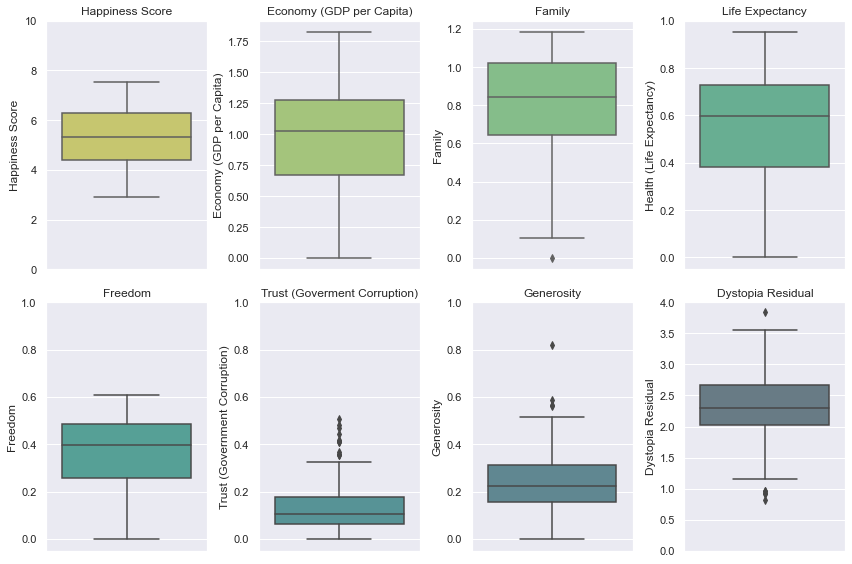

In [12]:
fig, axes = plt.subplots(2,4, figsize=(12,8))
sns.boxplot(data=df, y="Happiness Score", color='#d5d560', ax=axes[0,0]).set(title='Happiness Score')
axes[0,0].set(ylim=(0, 10))
sns.boxplot(data=df, y="Economy (GDP per Capita)", color='#a6d070', ax=axes[0,1]).set(title='Economy (GDP per Capita)')
sns.boxplot(data=df, y="Family", color='#7cc683', ax=axes[0,2]).set(title='Family')
sns.boxplot(data=df, y="Health (Life Expectancy)", color='#5cba94', ax=axes[0,3]).set(title='Life Expectancy')
axes[0,3].set(ylim=(-0.05, 1))
sns.boxplot(data=df, y="Freedom", color='#4aac9f', ax=axes[1,0]).set(title='Freedom')
axes[1,0].set(ylim=(-0.05, 1))
sns.boxplot(data=df, y="Trust (Government Corruption)", color='#4c9ca1', ax=axes[1,1]).set(title='Trust (Goverment Corruption)')
axes[1,1].set(ylim=(-0.05, 1))
sns.boxplot(data=df, y="Generosity", color='#588c99', ax=axes[1,2]).set(title='Generosity')
axes[1,2].set(ylim=(-0.05, 1))
sns.boxplot(data=df, y="Dystopia Residual", color='#637c8a', ax=axes[1,3]).set(title='Dystopia Residual')
axes[1,3].set(ylim=(0, 4))
fig.tight_layout()

### 5. Evaluating Noise and Cleaning Dataset

In [13]:
# Finding which country has the extremely high outlier for Generosity
generosity_outlier = df[df['Generosity'] == df['Generosity'].max()]
generosity_outlier

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.3988,0.42692,0.20243,0.81971,1.50655


#### Denoising and Cleaning Evaluation:

While it is tempting to remove some far outliers (ie Myanmar: Generosity score), each observation represents a different, unique country, so we shouldn't eliminate any samples entirely from the dataset.

That being said, in any subsequent analysis of Trust, Generosity and/or Dystopia Residual, it should be noted that these three fields all have several outliers in the data. Specifically when working with these variables, it would be worth comparing the difference in results when these outliers remain in the dataset vs when they are identified and dropped.

Additionally, there are no gaps in the dataset (based on counts from isna().sum()), so we do not need to drop any null values.

# Defining Objectives
The objectives for the data analysis tasks are:

Objective A - How do the variables that contribute to a 'Happiness Score' affect one another? This will give us a better idea of any overlapping factors that may be contributing to the overall 'Happiness Ranking' of each country. 


Objective B - Which geographical regions have the highest happiness scores? What is the distribution of happiness scores in each region? This will give us a better idea of how happiness scores are distributed worldwide and what kind of variability in happiness scores exists for each region.


Objective C - For the countries with the Top 10 happiness scores, what does the distribution of variables look like? Is there any variability between factors contributing to their average happiness scores?
    

# Present Your Findings

### Objective A - Analyze how variables that make-up the 'Happiness Score' affect one another. 

To see if any variables contributing to a country's 'Happiness Score' and therefore overall 'Happiness Ranking' have an affect one another, we will need to find the correlation between them.

#### 1. Choice of Visualization
- Correlation Heatmap - The color gradient will allow us to easily visualize and summarize closely related variables.


#### 2. Plot the graph

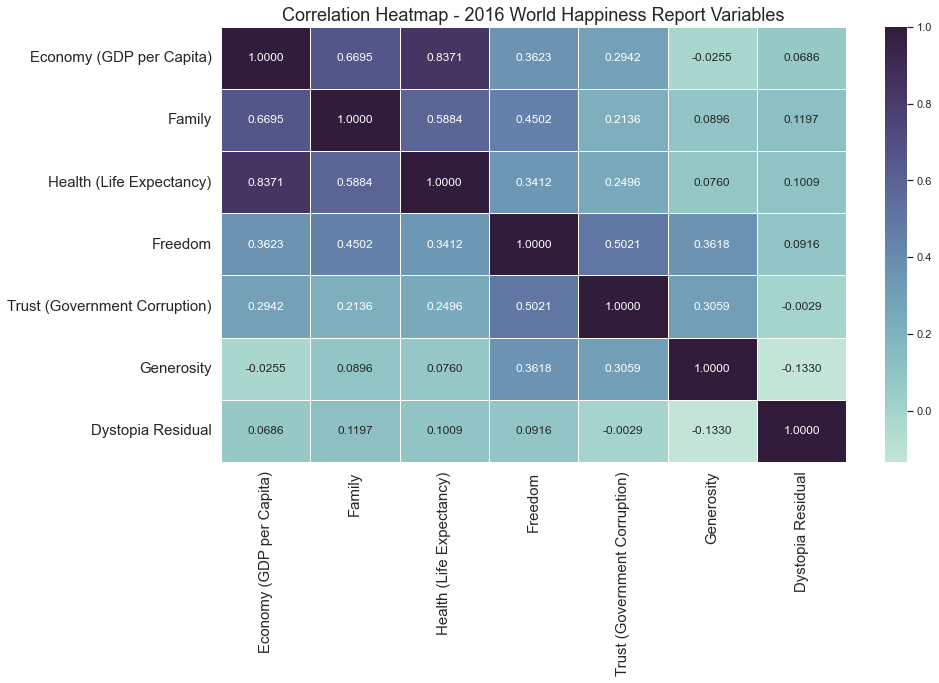

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

df_filtered = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                    'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
sns.set(rc = {'figure.figsize':(14,8)})
ax=sns.heatmap(df_filtered.corr(),annot=True, fmt=".4f",  linewidths=0.5, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
ax.set_title('Correlation Heatmap - 2016 World Happiness Report Variables', fontsize=18)
ax.tick_params(axis='both',labelsize=15)
plt.show()

#### 3. Inference



The higher the absolute value of the correlation score between two variable, the greater their relationship is. That being said, correlation does not imply causation, so we cannot say for sure the impacts that one variable has on another from this table. We can infer the linear relationship between two given variables and whether they are positively correlated (increasing proportionally) or nagatively correlated (inversely proportional).

From the heatmap, there is a strong positive correlation between GDP (per Capita) and health (life expectancy) (0.8371). This would make sense that wealthier countries would be more likely to afford basic necessities for their citizens (food, shelter, etc). Not as strong, but there is a negative correlation between Generosity and Dystopia Residual (-0.1330). This would mean that as the Dystopia residual of a country increases, their generosity would be decreasing. That being said, we mentioned above that both of these variables have several outliers, so let's remove outliers from these fields and re-evaluate the relationship. 

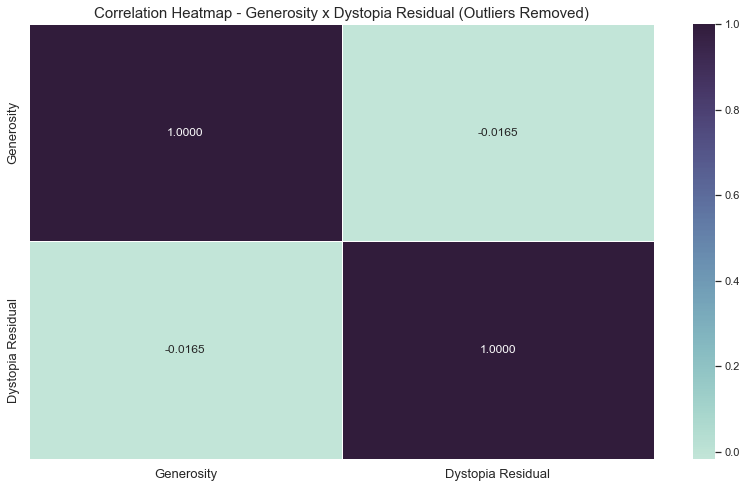

In [15]:
#Dropping outliers from Generosity and Dystopia Residual to see if their relationship changes
cols = ['Generosity', 'Dystopia Residual']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_filtered2 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_filtered2 = df_filtered2[['Generosity', 'Dystopia Residual']]

ax1 = sns.heatmap(df_filtered2.corr(),annot=True, fmt=".4f",  linewidths=0.5, 
                  cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
sns.set(rc = {'figure.figsize':(6,4)})
ax1.set_title('Correlation Heatmap - Generosity x Dystopia Residual (Outliers Removed)', fontsize=15)
ax1.tick_params(axis='both',labelsize=13)
plt.show()

#### Inference: Correlation of Generosity & Dystopia Residual (Outliers removed)

Once the outliers have been removed from both Generosity and Dystopia residual, we actually see the absolute value of the correlation drop by 0.1. The new correlation value of -0.0165 is very close to 0, which indicates that there likely isn't as much of a relationship between these two variables as we thought before removing the outliers.

## Objective B - Which geographical regions have the highest happiness scores? What is the distribution of happiness scores in each region?

This will give us a better idea of how happiness scores are distributed worldwide and what kind of variability in happiness scores exists for each region.

#### 1. Choice of Visualization 


- Barplot - To summarize average happiness scores across all 10 geographical regions

- Boxplot - To visualize the distribution and variabilty of happiness scores across all 10 geographic regions


In [16]:
# Regions and number of countries with happiness scores in each region

df.Region.value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

It is important to note here that 'Australia and New Zealand' and 'North America' each have only 2 reported countries. We should keep this in mind as we visualize their boxplots.

In [17]:
# group by each region, take the average happiness score, and plot results
df_region = df[['Region','Happiness Score']]
region_mean = df_region.groupby('Region').mean().sort_values(['Happiness Score'],ascending=False)
region_mean = region_mean.reset_index(drop=False)

#### 2. Plot the Graph

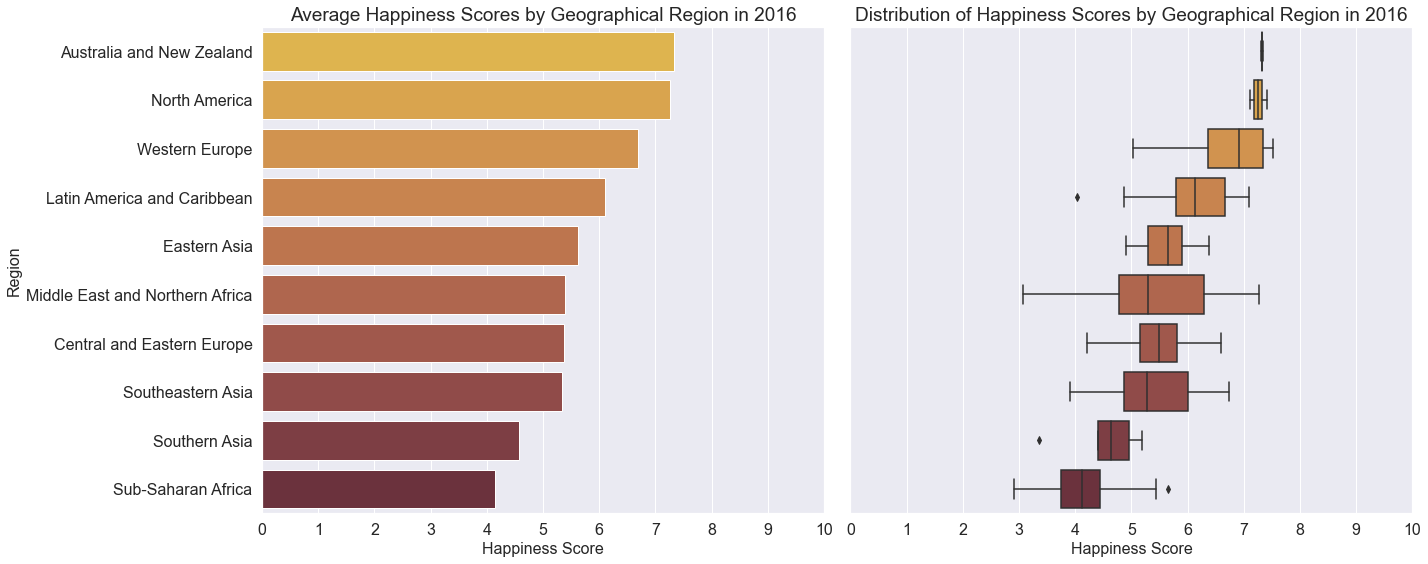

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

warm_color_palette = ('#f6be37','#f0a937','#e79439', '#dc813b', '#cf6f3c', '#bf5e3e', '#ae4e3e', '#9c403d', '#88333b', '#742837')
ax2 = sns.barplot(data=region_mean, y='Region', x='Happiness Score', palette=warm_color_palette, orient='h', ax=axes[0])
ax2.xaxis.set_ticks(np.arange(0, 11, 1))
ax2.tick_params(axis='both',labelsize=16)
ax2.set_xlabel('Happiness Score', fontsize=16)
ax2.set_ylabel('Region', fontsize=16)
ax2.set_title('Average Happiness Scores by Geographical Region in 2016', fontsize=19)

ax3 = sns.boxplot(data=df_region, y = 'Region', x='Happiness Score', 
                  order= ['Australia and New Zealand','North America','Western Europe','Latin America and Caribbean',
                          'Eastern Asia','Middle East and Northern Africa','Central and Eastern Europe','Southeastern Asia',
                          'Southern Asia','Sub-Saharan Africa'], palette=warm_color_palette, orient='h', ax=axes[1])
ax3.xaxis.set_ticks(np.arange(0, 11, 1))
plt.tick_params(labelleft=False, left=False)
ax3.set_xlabel('Happiness Score', fontsize=16)
ax3.set(ylabel=None)
ax3.tick_params(axis='both',labelsize=16)
ax3.set_title('Distribution of Happiness Scores by Geographical Region in 2016', fontsize=19)

fig.tight_layout()

#### Inference

Australia & New Zealand and North America have the highest overall happiness scores, but each of these regions only has two countries. Therefore, we see an incredibly small distribution of scores for these regions in the box plot.

The region with the largest range of happiness scores is 'Middle East and Northern Africa'. A potential explanation for the larger range of variability seen in regions such as Middle East & Northern Africa, Western Europe and Sub-Saharan Africa is that these regions contain roughly 3-4x (even up to 20x) the number of countries surveryed when compared to regions with fewer countries surveyed. Of the regions with < 10 countries surveyed, happiness score results from Southeastern Asia showed as much variability as regions with 2-3x as many countries.

## Objective C - For the countries with the Top 10 happiness scores, what does the distribution of variables look like? Is there any variability between factors contributing to their average happiness scores?

Information about the distribution of factors among the highest ranking countries will give us a better idea of which, if any, factors are most highly weighted in determining a country's average happiness score.

#### Choice of Visualization
- Stacked Bar Plot - To visualize the distribution of all measures contributing to happiness scores from 10 highest ranking happiness score countries
- Box Plot - To visualize the distribution and variability of each measured factor across the 10 highest ranking happiness score countries

In [19]:
# Dataframe is already sorted by highest ranking happiness score

df_top10 = df.head(10).set_index('Country') #New dataframe with only Top 10 highest happiness scoring countries
df_top10 = df_top10[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                    'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

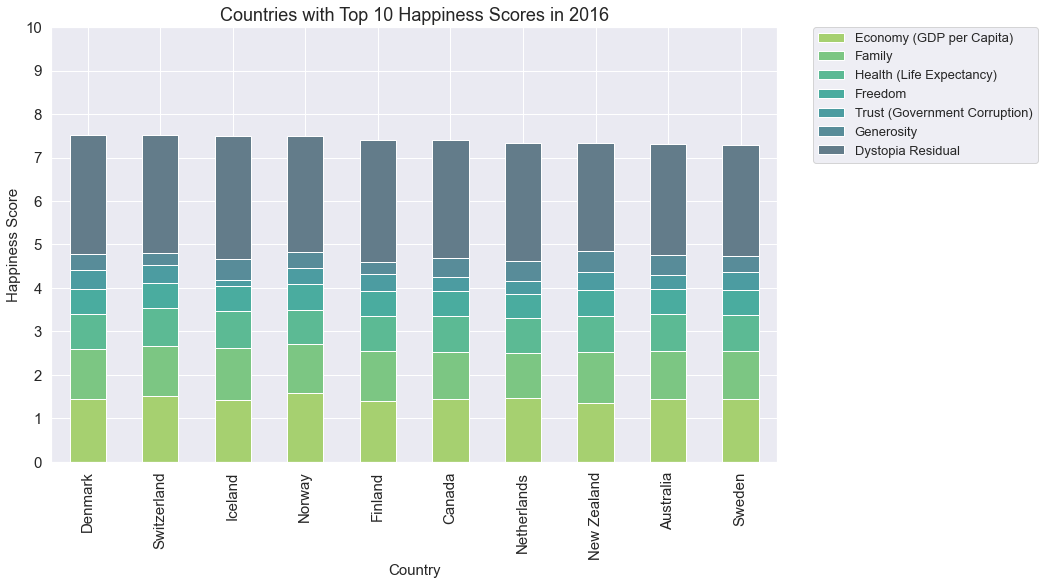

In [24]:
#Create stacked bar plot with all components of happiness score for each country

seven_color_palette = ('#a6d070', '#7cc683', '#5cba94', '#4aac9f', '#4c9ca1', '#588c99', '#637c8a')
sns.set(rc = {'figure.figsize':(13,8)})
ax5 = df_top10.plot(kind='bar', stacked=True, color=seven_color_palette)
ax5.set_xlabel('Country', fontsize=15)
ax5.set_ylabel('Happiness Score', fontsize=15)
ax5.set_title('Countries with Top 10 Happiness Scores in 2016', fontsize=18)
ax5.yaxis.set_ticks(np.arange(0, 11, 1))
ax5.tick_params(axis='both',labelsize=15)
ax5.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0, fontsize=13)

#### Inference - Bar plot of top 10 happiness scores

The distribution of features in total happiness score make-up for the top ranking countries appears to have very little variability. The only place we observe slight deviation is in measurement of Trust (Government Corruption) for Iceland as well as a slightly larger range of reported values for Generosity.

The distributions of each feature are individually assessed in the boxplots below:

<u>Boxplot of six variables measured for 2016 World Health Report</u>
- Removed Dystopia residual as this is a calculated measure used to explain disparity between the six measured variable totals and the reported happiness score of a given country
- Remaining six variables are named as the six measured factors contributing to happiness scores (https://s3.amazonaws.com/happiness-report/2016/HR-V1Ch1_web.pdf)

Text(0.5, 1.0, 'Top 10 Happiness Score Countries - World Happiness Report Factors')

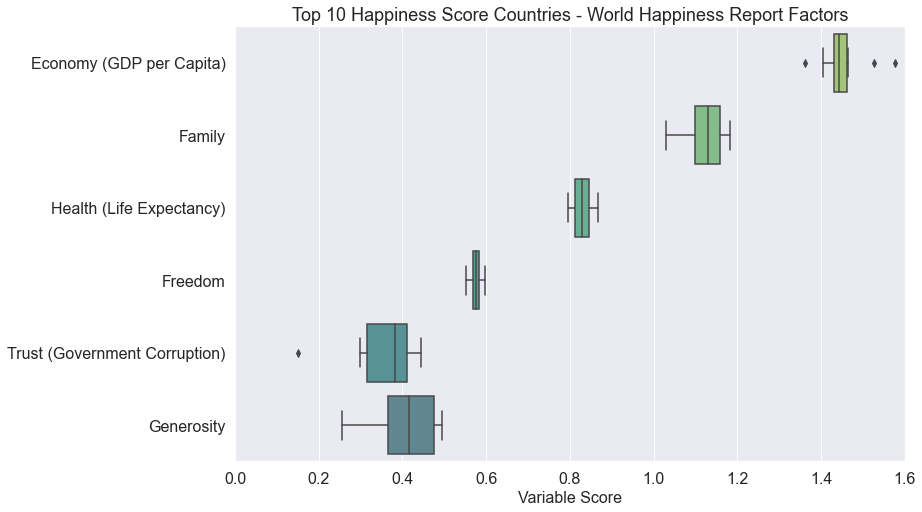

In [21]:
sns.set(rc = {'figure.figsize':(12,8)})
six_color_palette = ('#a6d070', '#7cc683', '#5cba94', '#4aac9f', '#4c9ca1', '#588c99')
ax6 = sns.boxplot(data=df_top10[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                    'Trust (Government Corruption)', 'Generosity']], palette=six_color_palette, orient = 'h')
ax6.set(xlim=(0.00, 1.6))
ax6.set_xlabel('Variable Score', fontsize=16)
ax6.tick_params(axis='both',labelsize=16)
ax6.xaxis.set_ticks(np.arange(0, 1.7, 0.2))
ax6.set_title('Top 10 Happiness Score Countries - World Happiness Report Factors', fontsize=18)

#### Inference - Box plots of 2016 World Happiness Report factors

While the range of values for the distribution of each feature is relatively small compared to the larger data set, there is still some variability among the top 10 happiness score ranking countries.

The feature with the largest range of values represented is Generosity. The feature with the least amount of variability is Freedom. Interestingly, Iceland is a significant outlier with a much lower Trust in Government score compared to the other highest ranking happiness score countries. For this reason, Iceland could present itself as a very interesting case study for further research.

Additionally, GDP (per Capita) has a few outliers in either direction. Perhaps in the larger data set the contribution of Economy (per Capita) towards the overall happiness score of a given country is more about crossing a certain threshold to maintain quality of life for citizens (ie food, shelter, safety). In this case, countries that are able to meet the basic needs of a majority of their constituents are more likely to have a higher ranking happiness score.

# Ethics

#### There could be an issue concerning ethics in the collection of data for complex issues in a binary response format

Source: https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

For the variables of Freedom, Generosity, Trust (Government Corruption), and Family (Social Support), results were calculated as the average of binary responses to a single question in each category:

- Freedom: "Are you sastisfied or dissatisfied with your freedom to choose what you do with your life?"
- Generosity: "Have you donated money to a charrity in the past month?'
- Trust: "Is corruption widespread throughput the government or not?"
- Family: "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"

It seems challenging to capture any one of these complex concepts with a single question. Even with a single question, it seems problematic that a concept such as generosity could be simply boiled down to donating money to a charity very recently. An individual may not have the financial means to donate money, but they could donate their time, material goods, or perhaps a needed skill set to someone in need of assistance. The timeframe of 'one month' also seems rather arbitrary. What if someone donates one large sum to charities yearly rather than monthly? Are they supposedly "less generous"?

While it makes sense to have somewhat universal questions that can be answered across the world, I do think that there is room for improvement in the chosen questions. Perhaps additional questions for each category could be asked as well to achieve a more well rounded measurement for such complex variables.